# EDA using Python 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
survival=pd.read_csv('Titanic_survival.csv')
data=pd.read_csv('test.csv')
survival.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
print(survival.shape)
print(data.shape)

(418, 2)
(418, 11)


In [5]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


By observing the datasets as number of rows are same, now we need to merge the survived feature on passengerid

In [6]:
df= pd.merge(survival, data, how='inner', on='PassengerId')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


As there is no specific instructions let's assume 0 in survived column is dead and 1 is alive

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [9]:
df.Sex.value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [10]:
df.Cabin.unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

Here we need to change Sex, Cabin and Embarked features to numeric when using ML algorithms

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


In cabin, age and Fare columns null values does exists

As cabin null values are more we can't do anything but in we can impute with Sex hot deck imputation. We can further do group by to impute values but may overfit. Fare has only 1 missing value so we can replace or remove.


In [12]:
df[df.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [13]:
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'),'Fare'].median()
print(median_fare)

8.05


In [14]:
df.Fare.fillna(median_fare, inplace=True)

In [15]:
# return null rows
df[df.Age.isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,0,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,0,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,1,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,1,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S


In [16]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      27.0
Name: Age, dtype: float64

In [17]:
age_sex_median = df.groupby('Sex').Age.transform('median')
df.Age.fillna(age_sex_median, inplace=True)

In [18]:
#option 2 : replace with median age of Pclass

# pclass_age_median = df.groupby('Pclass').Age.transform('median')
# df.Age.fillna(pclass_age_median , inplace=True)

#But may overfit

In [19]:
# selecting multiple columns using a list of column name strings
df[['Name','Age']].head()

,Name,Age
0,"Kelly, Mr. James",34.5
1,"Wilkes, Mrs. James (Ellen Needs)",47.0
2,"Myles, Mr. Thomas Francis",62.0
3,"Wirz, Mr. Albert",27.0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0


In [20]:
male_passengers = df.loc[df.Sex == 'male',:]
print('Number of male passengers : {0}'.format(len(male_passengers)))

Number of male passengers : 266


In [21]:
male_passengers = df.loc[df.Sex == 'female',:]
print('Number of female passengers : {0}'.format(len(male_passengers)))

Number of female passengers : 152


In [22]:
# using describe() to get statistics for all numeric columns
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,418.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Assaf, Mr. Gerios",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,29.599282,0.447368,0.392344,NaN,35.561214,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,12.703770,0.896760,0.981429,NaN,55.856789,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,23.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.471875,NaN,NaN


We can easily identify outliers in fare, parch, sibsp columns by observing max and 75%

In [23]:
# numerical feature
# centrality measures
print('Mean fare : {0}'.format(df.Fare.mean())) # mean
print('Median fare : {0}'.format(df.Fare.median())) # median

Mean fare : 35.561214354066955
Median fare : 14.4542


In [24]:
# dispersion measures
print('Min fare : {0}'.format(df.Fare.min())) # minimum
print('Max fare : {0}'.format(df.Fare.max())) # maximum
print('Fare range : {0}'.format(df.Fare.max()  - df.Fare.min())) # range
print('25 percentile : {0}'.format(df.Fare.quantile(.25))) # 25 percentile
print('50 percentile : {0}'.format(df.Fare.quantile(.5))) # 50 percentile
print('75 percentile : {0}'.format(df.Fare.quantile(.75))) # 75 percentile
print('Variance fare : {0}'.format(df.Fare.var())) # variance
print('Standard deviation fare : {0}'.format(df.Fare.std())) # standard deviation

Min fare : 0.0
Max fare : 512.3292
Fare range : 512.3292
25 percentile : 7.8958
50 percentile : 14.4542
75 percentile : 31.471875
Variance fare : 3119.980874965835
Standard deviation fare : 55.85678897829551


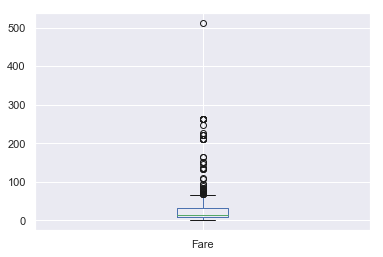

In [25]:
# box-whisker plot
df.Fare.plot(kind='box')

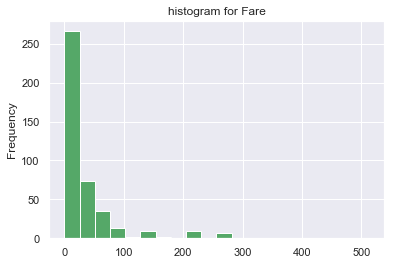

In [26]:
# histogram for fare
df.Fare.plot(kind='hist', title='histogram for Fare', color='g', bins=20);

In [27]:
print('skewness for fare : {0:.2f}'.format(df.Fare.skew()))

skewness for fare : 3.69


In [28]:
#transformations to reduce the skewness
LogFare = np.log(df.Fare + 1.0) # Adding 1 to accomodate zero fares : log(0) is not defined

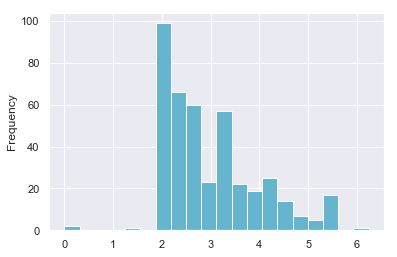

In [29]:
# Histogram of LogFare
LogFare.plot(kind='hist', color='c', bins=20);

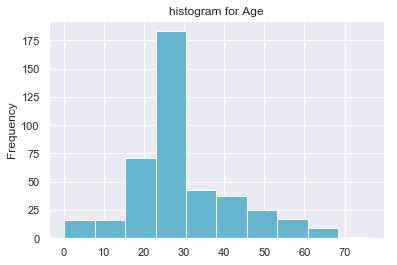

In [30]:
df.Age.plot(kind='hist', title='histogram for Age', color='c');

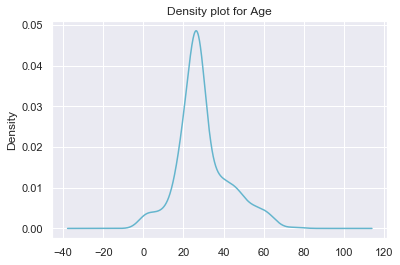

In [31]:
df.Age.plot(kind='kde', title='Density plot for Age', color='c');

In [32]:
print('skewness for age : {0:.2f}'.format(df.Age.skew()))

skewness for age : 0.66


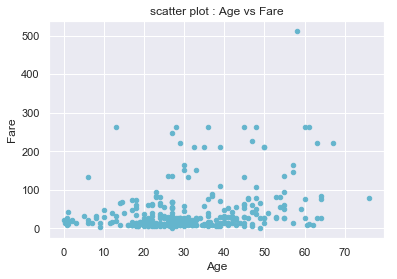

In [33]:
# use scatter plot for bi-variate distribution
df.plot.scatter(x='Age', y='Fare', color='c', title='scatter plot : Age vs Fare');

In [34]:
df.Age.corr(df.Fare)

0.34164708015407286

In [35]:
df.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

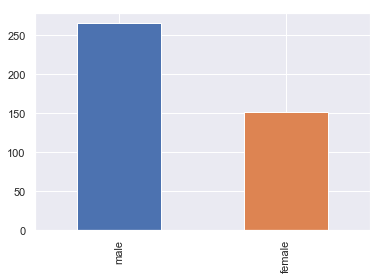

In [36]:
df.Sex.value_counts().plot(kind="bar")

In [37]:
df[df.Survived != -888].Survived.value_counts() 

0    266
1    152
Name: Survived, dtype: int64

# a) The survival rate

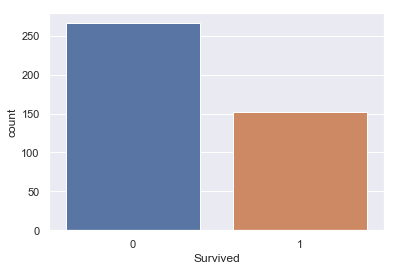

In [38]:
sns.countplot(x='Survived', data=df);

In [39]:
print(df.Survived.sum()/df.Survived.count())

0.36363636363636365


more people died than survived (36% survived)

In [40]:
# crosstab on Sex and Survived
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
female,0,152
male,266,0


All females are survived and all males are died

# b) what kind of passengers did not survive

In [41]:
pd.crosstab(df.Pclass, df.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,57,50,107
2,63,30,93
3,146,72,218
All,266,152,418


In [42]:
print("% of survivals in") 
print("Pclass=1 : ", df.Survived[df.Pclass == 1].sum()/df[df.Pclass == 1].Survived.count())
print("Pclass=2 : ", df.Survived[df.Pclass == 2].sum()/df[df.Pclass == 2].Survived.count())
print("Pclass=3 : ", df.Survived[df.Pclass == 3].sum()/df[df.Pclass == 3].Survived.count())

% of survivals in
Pclass=1 :  0.4672897196261682
Pclass=2 :  0.3225806451612903
Pclass=3 :  0.3302752293577982


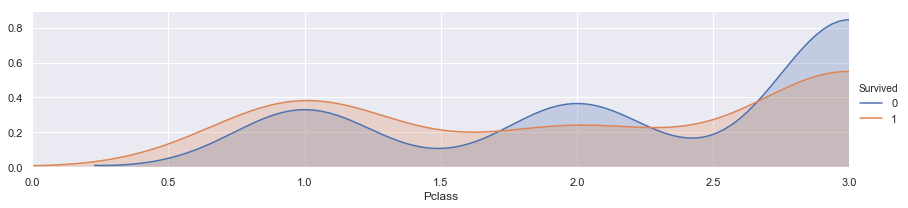

In [43]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Pclass',shade= True)
facet.set(xlim=(0, data['Pclass'].max()))
facet.add_legend()
 
plt.show()

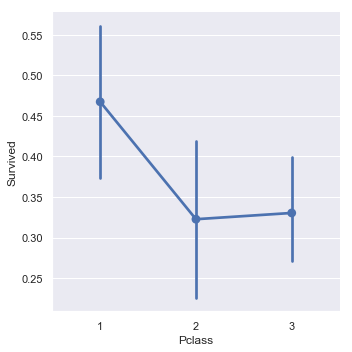

In [44]:
sns.catplot('Pclass','Survived', kind='point', data=df);

Pclass 1 survived more. 2 and 3 Pclass didnot Survived

Embarked : Survival rate

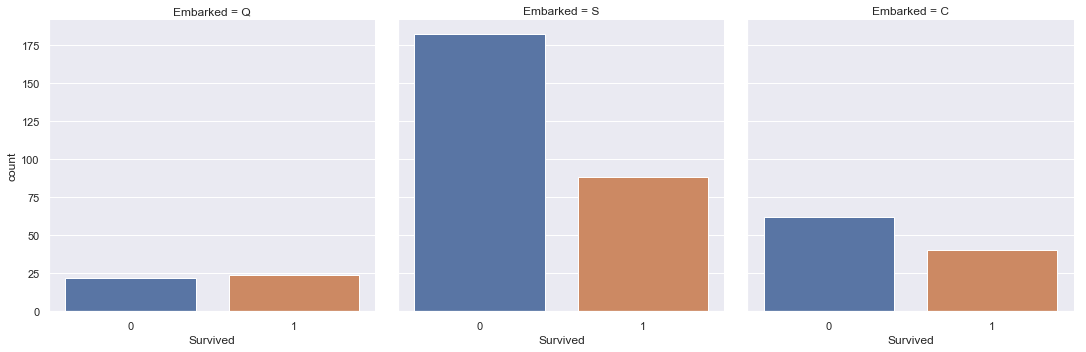

In [45]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df);

People Embarked in 'S' died most

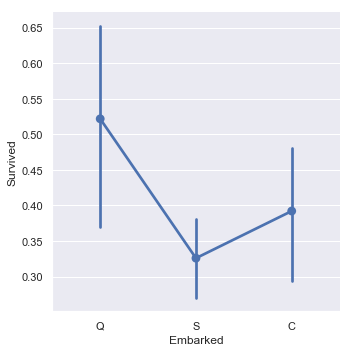

In [46]:
sns.catplot('Embarked','Survived', kind='point', data=df)
plt.show()

People Embarked at Q survived more than 50%

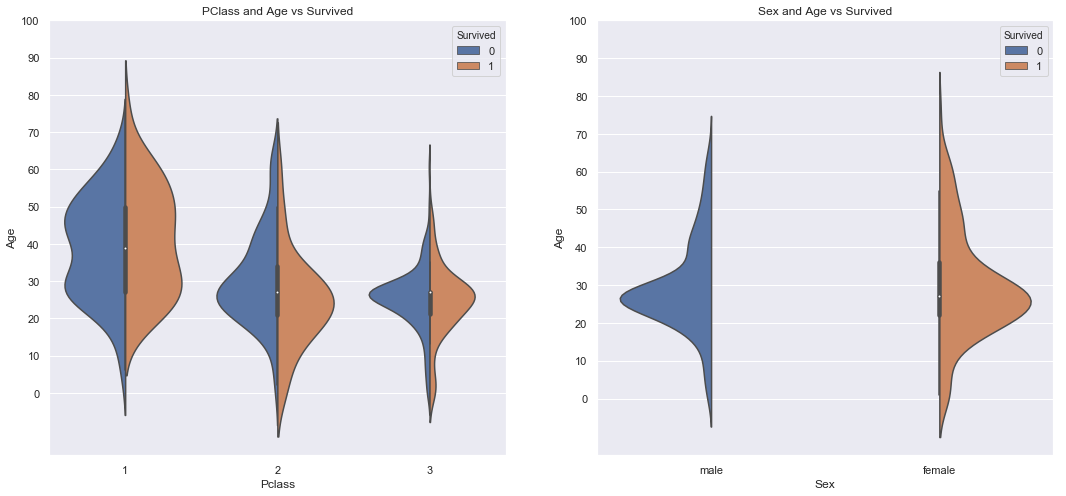

In [64]:
import seaborn as sb
f,ax=plt.subplots(1,2,figsize=(18,8))
sb.violinplot('Pclass','Age',hue='Survived',data=df,split=True,ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sb.violinplot("Sex","Age", hue="Survived", data=df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

Above Violin plot shows the distribution of survived is normal in female

# c) Show us EDA that can best explain the fate of the passenger and show us which of the variables are significant in explaining this 

A quick further look.
As we already know surely that females survival rate is 100%

In [52]:
cat_vars = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Cabin']
text_vars = ['Name', 'Ticked']
num_vars = ['Age', 'Fare']

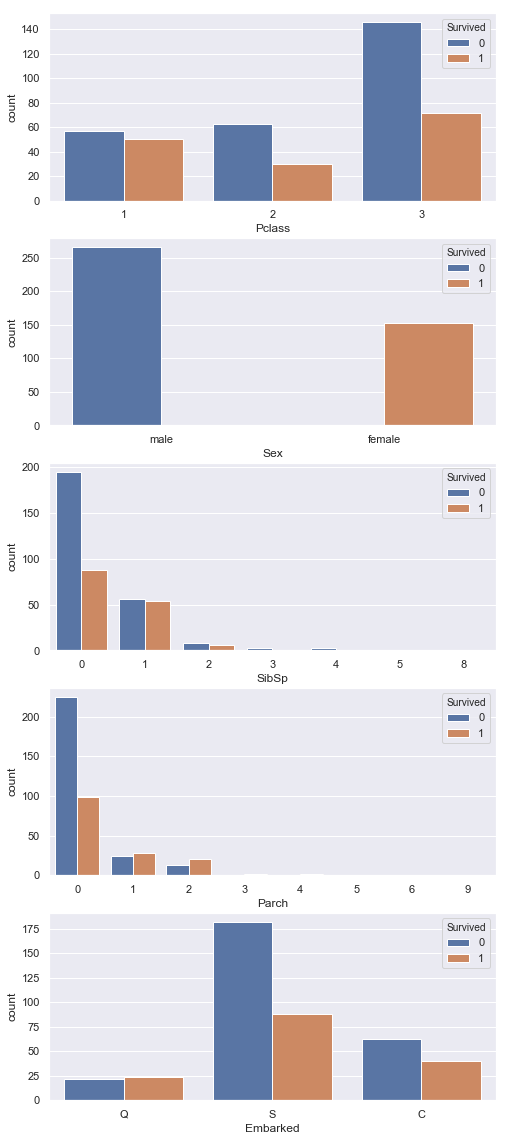

In [53]:
fig, axs = plt.subplots(nrows=5, figsize=(8,20), sharex=False)
for i in range(5):
    sns.countplot(x=cat_vars[i], data=df, hue='Survived', ax=axs[i])

Pclass 3 died more

If Number of Siblings/Spouses Aboard is 0 then death rate is double

If Number of Parents/Children Aboard is 0 then death rate is double and when it is 1 or more survival rate is more

If Person embarked at S or C chances of alive is very less

Here we know that only males are died that means whereever death rate is more there the males are more

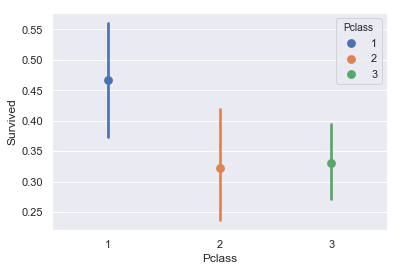

In [59]:
# This would be some sort of "univariate" way of using the function
sns.pointplot(x="Pclass", y="Survived", hue="Pclass", data=df)


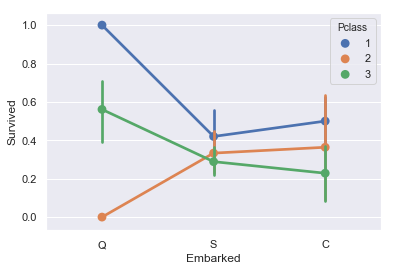

In [61]:
# Comparing Embarked and Pclass by the proportion of Survived
sns.pointplot(x="Embarked", y="Survived", hue="Pclass", data=df)

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


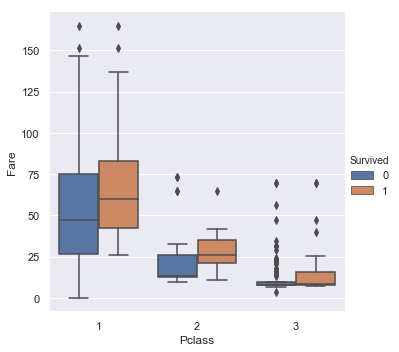

In [57]:
#Fare by Pclass and Survived
sns.factorplot(x="Pclass", y="Fare", hue="Survived", data=df[df.Fare < 200], kind="box")

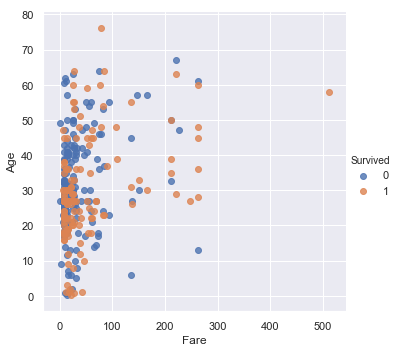

In [62]:
sns.lmplot(x="Fare", y="Age", hue="Survived", data=df, fit_reg=False)

we can observe less age and more fare people survived in high number

In [65]:
df['FamilySize'] = df['SibSp'] + df['Parch']
print(df[['Pclass','FamilySize']].groupby('FamilySize').agg('count'))

            Pclass
FamilySize        
0              253
1               74
2               57
3               14
4                7
5                3
6                4
7                2
10               4


In [66]:
df['WithFamily'] = 0
df['WithFamily'][df['FamilySize']>0] = 1

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


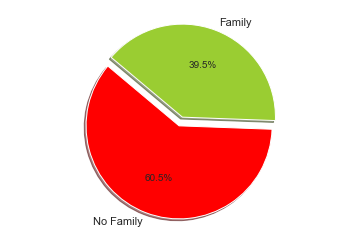

In [68]:
labels = 'No Family', 'Family'
sizes = [df['WithFamily'][df['WithFamily'] == 0].count(), df['WithFamily'][df['WithFamily'] == 1].count()]
colors = ['red', 'yellowgreen']
explode = (0.1, 0 )  # explode 1st slice
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

So, with family survived more

In [47]:
#pandas get_dummies for categorical features
df_train_ml = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)\

In [48]:
df_train_ml.drop(['Name','Ticket', 'Cabin'],axis=1,inplace=True)
df_train_ml.dropna(inplace=True)

In [49]:
df_train_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Sex_male       418 non-null uint8
Embarked_Q     418 non-null uint8
Embarked_S     418 non-null uint8
Pclass_2       418 non-null uint8
Pclass_3       418 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 24.9 KB


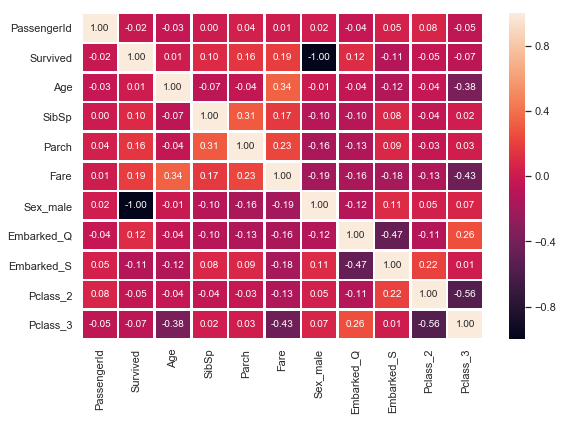

In [69]:
corr = df_train_ml.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

We can find correlation between fare and Pclass also

The above discused variables are significant to see the fate of passengers